In [1]:
%load_ext autoreload
%autoreload 2

import uproot as ur
import awkward as ak
import numpy as np

mac = False

data_path = '/fast_scratch/atlas_images/v01-45/'
if mac:
    data_path = '/Users/swiatlow/Data/caloml/graph_data/'

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "7"
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
import tensorflow as tf

# energyflow imports
import energyflow as ef
from energyflow.archs import PFN

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [4]:
X = np.load(data_path+'X_4.npy')

In [5]:
Y = tf.keras.utils.to_categorical(np.concatenate((np.ones(90000), np.zeros(90000))))

In [6]:
Phi_sizes, F_sizes = (50, 50, 64), (50, 50, 50)


In [7]:
from energyflow.utils import data_split

# do train/val/test split 
(X_train, X_val, X_test,
 Y_train, Y_val, Y_test) = data_split(X, Y, val=10000, test=40000)

print('Done train/val/test split')

Done train/val/test split


In [8]:
pfn = PFN(input_dim=X.shape[-1], Phi_sizes=Phi_sizes, F_sizes=F_sizes)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 50)     250         input[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, None, 50)     0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 50)     2550        activation[0][0]                 
______________________________________________________________________________________________

In [9]:
# train model
history = pfn.fit(X_train, Y_train,
        epochs=100,
        batch_size=500,
        validation_data=(X_val, Y_val),
        verbose=1)

Epoch 1/100
260/260 [==============================] - 11s 32ms/step - loss: 7.0574 - acc: 0.7097 - val_loss: 0.5799 - val_acc: 0.7836
Epoch 2/100
260/260 [==============================] - 9s 33ms/step - loss: 0.4655 - acc: 0.7796 - val_loss: 0.4187 - val_acc: 0.7946
Epoch 3/100
260/260 [==============================] - 7s 28ms/step - loss: 0.4193 - acc: 0.7964 - val_loss: 0.4162 - val_acc: 0.8045
Epoch 4/100
260/260 [==============================] - 8s 31ms/step - loss: 0.4242 - acc: 0.8080 - val_loss: 0.3768 - val_acc: 0.8199
Epoch 5/100
260/260 [==============================] - 8s 31ms/step - loss: 0.3880 - acc: 0.8248 - val_loss: 0.3224 - val_acc: 0.8827
Epoch 6/100
260/260 [==============================] - 8s 30ms/step - loss: 0.3344 - acc: 0.8600 - val_loss: 0.3187 - val_acc: 0.8877
Epoch 7/100
260/260 [==============================] - 8s 30ms/step - loss: 0.3051 - acc: 0.8803 - val_loss: 0.3132 - val_acc: 0.8832
Epoch 8/100
260/260 [==============================] - 7s 28m

In [10]:
preds = pfn.predict(X_test, batch_size=1000)

In [11]:
pfn_fp, pfn_tp, threshs = roc_curve(Y_test[:,1], preds[:,1])

In [12]:
# get area under the ROC curve
auc = roc_auc_score(Y_test[:,1], preds[:,1])
print()
print('PFN AUC:', auc)
print()


PFN AUC: 0.9761169319796845



In [ ]:
#0.9683 with 3 var input
#0.9761 with 4 var input

<Figure size 432x288 with 0 Axes>

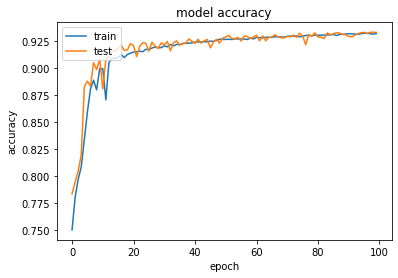

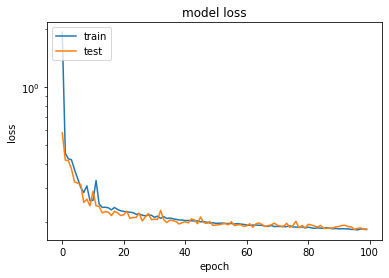

In [14]:
    plt.cla(); plt.clf()
    fig = plt.figure()
    fig.patch.set_facecolor('white')

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    # plt.savefig('Plots/accuracy_' + layer + '.pdf')
    plt.show()


    # summarize history for loss
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.yscale('log')
    plt.legend(['train', 'test'], loc='upper left')
    # plt.savefig(plotpath + 'loss_' + layer + '.pdf')
    plt.show()